# Image Classification

-----

## Fruits and vegetables image classifications 

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Input,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
import numpy as np

data_train_path ="dataset/fruit-and-vegetable-image-recognition/train"
data_test_path="dataset/fruit-and-vegetable-image-recognition/test"
data_val_path = "dataset/fruit-and-vegetable-image-recognition/validation"

2024-07-15 03:03:53.597225: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-15 03:03:54.198045: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 3115 files belonging to 36 classes.


2024-07-15 03:04:00.094389: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 997 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:38:00.0, compute capability: 8.9
2024-07-15 03:04:00.095994: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 997 MB memory:  -> device: 1, name: NVIDIA L4, pci bus id: 0000:3a:00.0, compute capability: 8.9
2024-07-15 03:04:00.097356: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 997 MB memory:  -> device: 2, name: NVIDIA L4, pci bus id: 0000:3c:00.0, compute capability: 8.9
2024-07-15 03:04:00.098703: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 997 MB memory:  -> device: 3, name: NVIDIA L4, pci bus id: 0000:3e:00.0, compute capability: 8.9


Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


2024-07-15 03:04:01.040060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:04:01.085640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:04:01.993109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


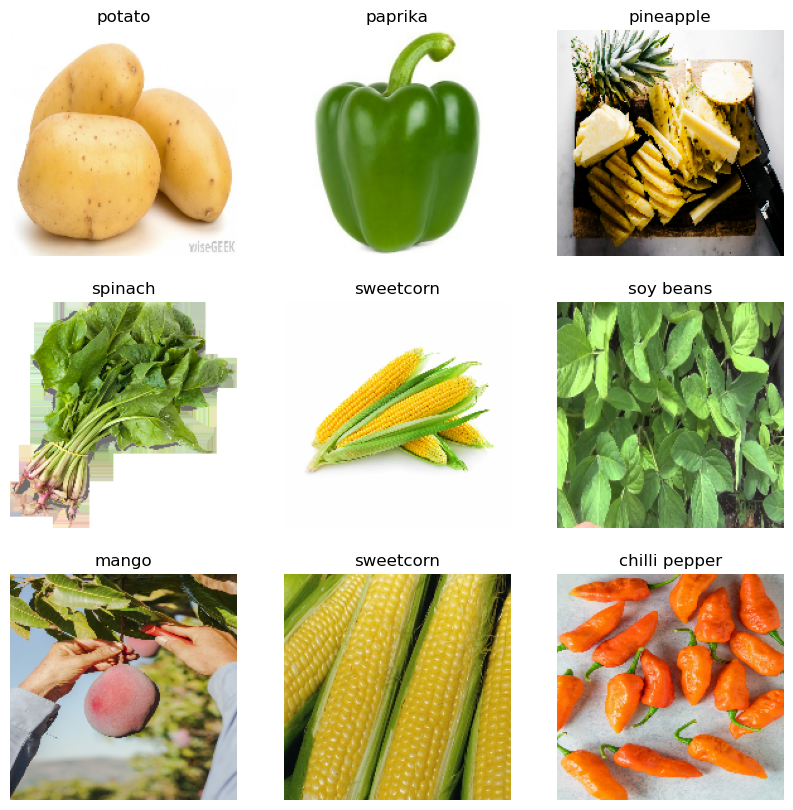

In [2]:
img_width = 180
img_height = 180

data_train = tf.keras.utils.image_dataset_from_directory(
data_train_path,
    shuffle= True,
    image_size= (img_width, img_height),
    batch_size = 32,
    validation_split=False
)

data_cat = data_train.class_names

data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width,img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_width,img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
        

In [3]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [5]:
from tensorflow.keras.layers import Rescaling

# Define the rescaling layer
rescaling = Rescaling(1./255)

# Define the Sequential model
model = Sequential([
    rescaling,  # Rescaling layer
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.2),
    Dense(128),
    Dense(len(data_cat)),
])

In [6]:
model.compile(optimizer='adam', loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
import time

# Start the timer
start_time = time.time()

epochs =25
history = model.fit(data_train, validation_data=data_val,epochs=epochs,batch_size=32,verbose=1 )

# End the timer
end_time = time.time()

# Calculate total training time
total_time = end_time - start_time

total_time

Epoch 1/25


2024-07-15 03:05:28.396227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:28.421578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:29.191072: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1721012730.285448   21921 service.cc:145] XLA service 0x7fd4fc300b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721012730.285479   21921 service.cc:153]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
I0000 00:00:1721012730.285483   21921 service.cc:153]   StreamExecutor device (1): NVIDIA L4, Compute Capability 8.9
I0000 00:00:1721012730.285485   21921 service.cc:153]   StreamExecutor device (2): NVIDIA L4, Compute Capability 8.9
I0000 00:00:1721012730.285487   21921 service.cc:153]   StreamExecutor device (3): NVIDIA L4, Compute Capability 8.9
2024-07-15 03:

13/98 [==>...........................] - ETA: 9s - loss: 4.2383 - accuracy: 0.0457 

2024-07-15 03:05:32.202680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 3.9373 - accuracy: 0.0367

2024-07-15 03:05:32.910365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 6s - loss: 3.8327 - accuracy: 0.0365

2024-07-15 03:05:33.549012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:33.619681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 5s - loss: 3.7899 - accuracy: 0.0358

2024-07-15 03:05:33.972832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 5s - loss: 3.7336 - accuracy: 0.0425

2024-07-15 03:05:34.249555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 3.6682 - accuracy: 0.0526

2024-07-15 03:05:34.540893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 3.6462 - accuracy: 0.0525

2024-07-15 03:05:34.814475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 3.6015 - accuracy: 0.0566

2024-07-15 03:05:35.070199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 3.5715 - accuracy: 0.0603

2024-07-15 03:05:35.405272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:35.408760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:35.447371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:35.601238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 3.4981 - accuracy: 0.0699

2024-07-15 03:05:36.236281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 3.4497 - accuracy: 0.0794

2024-07-15 03:05:36.529347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 3.4231 - accuracy: 0.0807

2024-07-15 03:05:36.923578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:36.986291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:37.027477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:37.027906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 3.3829 - accuracy: 0.0883

2024-07-15 03:05:37.625223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 3.3383 - accuracy: 0.0954

2024-07-15 03:05:37.902668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.3204 - accuracy: 0.0998

2024-07-15 03:05:39.063184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:39.253488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 24s 90ms/step - loss: 3.3204 - accuracy: 0.0998 - val_loss: 2.3870 - val_accuracy: 0.2934
Epoch 2/25


2024-07-15 03:05:39.831414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:39.867426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 9s - loss: 2.6402 - accuracy: 0.2642 

2024-07-15 03:05:41.578607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 2.6186 - accuracy: 0.2826

2024-07-15 03:05:42.298255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 6s - loss: 2.5790 - accuracy: 0.2760

2024-07-15 03:05:42.949543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:43.013604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 2.5487 - accuracy: 0.2884

2024-07-15 03:05:43.368064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 2.5587 - accuracy: 0.2796

2024-07-15 03:05:43.631661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 4s - loss: 2.5358 - accuracy: 0.2907

2024-07-15 03:05:43.924701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 2.5252 - accuracy: 0.2939

2024-07-15 03:05:44.214995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 2.5170 - accuracy: 0.2983

2024-07-15 03:05:44.485667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 2.5030 - accuracy: 0.3012

2024-07-15 03:05:44.803319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:44.807434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:44.836455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 2.4874 - accuracy: 0.3080

2024-07-15 03:05:45.009882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 2s - loss: 2.4553 - accuracy: 0.3152

2024-07-15 03:05:45.666811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 2.4364 - accuracy: 0.3197

2024-07-15 03:05:45.958815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 2.4054 - accuracy: 0.3248

2024-07-15 03:05:46.363979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:46.431402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:46.466064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:46.466338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 2.3951 - accuracy: 0.3296

2024-07-15 03:05:47.055797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 2.3839 - accuracy: 0.3295

2024-07-15 03:05:47.327432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 2.3681 - accuracy: 0.3316

2024-07-15 03:05:48.245831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:48.433782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 87ms/step - loss: 2.3681 - accuracy: 0.3316 - val_loss: 1.4393 - val_accuracy: 0.6410
Epoch 3/25


2024-07-15 03:05:49.013318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:49.037533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 1.9568 - accuracy: 0.4351

2024-07-15 03:05:50.742697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 1.9490 - accuracy: 0.4402

2024-07-15 03:05:51.458947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 1.9436 - accuracy: 0.4427

2024-07-15 03:05:52.086134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:52.145473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 1.9135 - accuracy: 0.4527

2024-07-15 03:05:52.502035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 1.8818 - accuracy: 0.4599

2024-07-15 03:05:52.769026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 1.8842 - accuracy: 0.4609

2024-07-15 03:05:53.066943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 1.8542 - accuracy: 0.4681

2024-07-15 03:05:53.335302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 1.8438 - accuracy: 0.4705

2024-07-15 03:05:53.579899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 1.8626 - accuracy: 0.4714

2024-07-15 03:05:53.925890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:53.928991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:53.967179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 1.8511 - accuracy: 0.4718

2024-07-15 03:05:54.131315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 1.8358 - accuracy: 0.4761

2024-07-15 03:05:54.773711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 1.8107 - accuracy: 0.4793

2024-07-15 03:05:55.069613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 1.7960 - accuracy: 0.4838

2024-07-15 03:05:55.481730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:55.545945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:55.583677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:55.583965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 1.7812 - accuracy: 0.4869

2024-07-15 03:05:56.163093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


93/98 [===========================>..] - ETA: 0s - loss: 1.7709 - accuracy: 0.4926

2024-07-15 03:05:56.435429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.7591 - accuracy: 0.4976

2024-07-15 03:05:57.137389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:57.314217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 83ms/step - loss: 1.7591 - accuracy: 0.4976 - val_loss: 0.9307 - val_accuracy: 0.7749
Epoch 4/25


2024-07-15 03:05:57.866160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:05:57.896318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 1.5116 - accuracy: 0.5673

2024-07-15 03:05:59.601322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 1.3990 - accuracy: 0.5992

2024-07-15 03:06:00.289886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 1.3424 - accuracy: 0.6187

2024-07-15 03:06:00.935507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:00.999743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 1.3440 - accuracy: 0.6116

2024-07-15 03:06:01.368478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 1.3261 - accuracy: 0.6162

2024-07-15 03:06:01.631377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 1.3027 - accuracy: 0.6200

2024-07-15 03:06:01.905873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 1.2835 - accuracy: 0.6270

2024-07-15 03:06:02.187418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 3s - loss: 1.2613 - accuracy: 0.6352

2024-07-15 03:06:02.449770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 1.2371 - accuracy: 0.6428

2024-07-15 03:06:02.776144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:02.779178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:02.810378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 1.2366 - accuracy: 0.6431

2024-07-15 03:06:02.990174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 2s - loss: 1.2109 - accuracy: 0.6487

2024-07-15 03:06:03.652741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1s - loss: 1.1886 - accuracy: 0.6554

2024-07-15 03:06:03.954901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 1.1821 - accuracy: 0.6547

2024-07-15 03:06:04.329945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:04.427146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:04.436504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:04.436947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 1.1590 - accuracy: 0.6632

2024-07-15 03:06:05.059440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


93/98 [===========================>..] - ETA: 0s - loss: 1.1489 - accuracy: 0.6683

2024-07-15 03:06:05.333569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.1372 - accuracy: 0.6706

2024-07-15 03:06:06.014031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:06.189181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 83ms/step - loss: 1.1372 - accuracy: 0.6706 - val_loss: 0.6276 - val_accuracy: 0.8547
Epoch 5/25


2024-07-15 03:06:06.695098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:06.744945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.7648 - accuracy: 0.7885

2024-07-15 03:06:08.429165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.7393 - accuracy: 0.8071

2024-07-15 03:06:09.130176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.7248 - accuracy: 0.8031

2024-07-15 03:06:09.762270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:09.825374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.7156 - accuracy: 0.8045

2024-07-15 03:06:10.170287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.7242 - accuracy: 0.8037

2024-07-15 03:06:10.438116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.7353 - accuracy: 0.7997

2024-07-15 03:06:10.718807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.7259 - accuracy: 0.8032

2024-07-15 03:06:10.984111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.7058 - accuracy: 0.8060

2024-07-15 03:06:11.248329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.6942 - accuracy: 0.8066

2024-07-15 03:06:11.577663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:11.581034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:11.611930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.8075

2024-07-15 03:06:11.779159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 2s - loss: 0.6693 - accuracy: 0.8129

2024-07-15 03:06:12.424085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1s - loss: 0.6567 - accuracy: 0.8175

2024-07-15 03:06:12.702199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.6549 - accuracy: 0.8184

2024-07-15 03:06:13.093017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:13.193550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:13.195515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:13.197220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.6540 - accuracy: 0.8223

2024-07-15 03:06:13.807003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.6431 - accuracy: 0.8245

2024-07-15 03:06:14.074154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.6433 - accuracy: 0.8244

2024-07-15 03:06:14.774654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:14.960993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 82ms/step - loss: 0.6433 - accuracy: 0.8244 - val_loss: 0.4579 - val_accuracy: 0.9145
Epoch 6/25


2024-07-15 03:06:15.494296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:15.504142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.6520 - accuracy: 0.8558

2024-07-15 03:06:17.193456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.6083 - accuracy: 0.8410

2024-07-15 03:06:17.890708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.5902 - accuracy: 0.8333

2024-07-15 03:06:18.528060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:18.591607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.5823 - accuracy: 0.8366

2024-07-15 03:06:18.937760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.5602 - accuracy: 0.8454

2024-07-15 03:06:19.200458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.5485 - accuracy: 0.8466

2024-07-15 03:06:19.499922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.5467 - accuracy: 0.8491

2024-07-15 03:06:19.772976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.5221 - accuracy: 0.8538

2024-07-15 03:06:20.028298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.5047 - accuracy: 0.8583

2024-07-15 03:06:20.364670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:20.368614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:20.411082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 0.4915 - accuracy: 0.8619

2024-07-15 03:06:20.574059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.4699 - accuracy: 0.8658

2024-07-15 03:06:21.230595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 1s - loss: 0.4527 - accuracy: 0.8713

2024-07-15 03:06:21.508727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.4509 - accuracy: 0.8726

2024-07-15 03:06:21.913830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:22.000561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:22.018263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:22.018899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.4483 - accuracy: 0.8761

2024-07-15 03:06:22.623847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.4295 - accuracy: 0.8810

2024-07-15 03:06:22.904836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.4239 - accuracy: 0.8828

2024-07-15 03:06:23.591077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:23.777365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 83ms/step - loss: 0.4239 - accuracy: 0.8828 - val_loss: 0.4671 - val_accuracy: 0.9316
Epoch 7/25


2024-07-15 03:06:24.318840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:24.356581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.3278 - accuracy: 0.9351

2024-07-15 03:06:26.083047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.3216 - accuracy: 0.9266

2024-07-15 03:06:26.764670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.3131 - accuracy: 0.9240

2024-07-15 03:06:27.411262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:27.469365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.3293 - accuracy: 0.9223

2024-07-15 03:06:27.820539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.3255 - accuracy: 0.9215

2024-07-15 03:06:28.084423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.3126 - accuracy: 0.9240

2024-07-15 03:06:28.386648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.3022 - accuracy: 0.9282

2024-07-15 03:06:28.653380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.2932 - accuracy: 0.9292

2024-07-15 03:06:28.907612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.2943 - accuracy: 0.9289

2024-07-15 03:06:29.240346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:29.244436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:29.274412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:29.436538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.2758 - accuracy: 0.9311

2024-07-15 03:06:30.100274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 0.2744 - accuracy: 0.9320

2024-07-15 03:06:30.371388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.2740 - accuracy: 0.9335

2024-07-15 03:06:30.769517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:30.863478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:30.871638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:30.872005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.2644 - accuracy: 0.9360

2024-07-15 03:06:31.492381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.2637 - accuracy: 0.9355

2024-07-15 03:06:31.760194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.2756 - accuracy: 0.9355

2024-07-15 03:06:32.428625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:32.618602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 82ms/step - loss: 0.2756 - accuracy: 0.9355 - val_loss: 0.5077 - val_accuracy: 0.9430
Epoch 8/25


2024-07-15 03:06:33.094238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:33.120853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.2073 - accuracy: 0.9423

2024-07-15 03:06:34.784914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.2645 - accuracy: 0.9389

2024-07-15 03:06:35.495633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.2527 - accuracy: 0.9385

2024-07-15 03:06:36.116584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:36.175261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.2505 - accuracy: 0.9384

2024-07-15 03:06:36.538337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.2567 - accuracy: 0.9367

2024-07-15 03:06:36.782448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.2508 - accuracy: 0.9368

2024-07-15 03:06:37.074988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.2437 - accuracy: 0.9382

2024-07-15 03:06:37.353100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.2394 - accuracy: 0.9387

2024-07-15 03:06:37.615937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.2358 - accuracy: 0.9397

2024-07-15 03:06:37.937188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:37.941329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:37.976287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:38.136092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.2360 - accuracy: 0.9389

2024-07-15 03:06:38.782240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1s - loss: 0.2353 - accuracy: 0.9379

2024-07-15 03:06:39.065622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.2357 - accuracy: 0.9375

2024-07-15 03:06:39.446112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:39.523185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:39.550148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:39.550536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.2403 - accuracy: 0.9379

2024-07-15 03:06:40.136732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


93/98 [===========================>..] - ETA: 0s - loss: 0.2410 - accuracy: 0.9368

2024-07-15 03:06:40.399191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.2442 - accuracy: 0.9371

2024-07-15 03:06:41.072234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:41.258591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 82ms/step - loss: 0.2442 - accuracy: 0.9371 - val_loss: 0.3944 - val_accuracy: 0.9544
Epoch 9/25


2024-07-15 03:06:41.768526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:41.799400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.1700 - accuracy: 0.9712

2024-07-15 03:06:43.483992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.1879 - accuracy: 0.9620

2024-07-15 03:06:44.178485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.1979 - accuracy: 0.9594

2024-07-15 03:06:44.813553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:44.874897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 5s - loss: 0.1927 - accuracy: 0.9586

2024-07-15 03:06:45.223711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.1908 - accuracy: 0.9575

2024-07-15 03:06:45.476216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.1970 - accuracy: 0.9581

2024-07-15 03:06:45.750450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.1985 - accuracy: 0.9561

2024-07-15 03:06:46.017053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.1920 - accuracy: 0.9570

2024-07-15 03:06:46.291900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 2s - loss: 0.1801 - accuracy: 0.9596

2024-07-15 03:06:46.614511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:46.618423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:46.653450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:46.810259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 2s - loss: 0.1772 - accuracy: 0.9598

2024-07-15 03:06:47.445803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 0.1757 - accuracy: 0.9603

2024-07-15 03:06:47.727028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.1753 - accuracy: 0.9597

2024-07-15 03:06:48.116565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:48.197151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:48.220520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:48.220876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.1757 - accuracy: 0.9600

2024-07-15 03:06:48.817318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.1694 - accuracy: 0.9611

2024-07-15 03:06:49.094734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:49.744136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:49.918903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 81ms/step - loss: 0.1698 - accuracy: 0.9612 - val_loss: 0.4988 - val_accuracy: 0.9487
Epoch 10/25


2024-07-15 03:06:50.405466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:50.432909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 9s - loss: 0.3110 - accuracy: 0.9602 

2024-07-15 03:06:52.123401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.1920 - accuracy: 0.9701

2024-07-15 03:06:52.831937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.1798 - accuracy: 0.9688

2024-07-15 03:06:53.464596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:53.538080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.1672 - accuracy: 0.9696

2024-07-15 03:06:53.880909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.2053 - accuracy: 0.9655

2024-07-15 03:06:54.138697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.1959 - accuracy: 0.9652

2024-07-15 03:06:54.427291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.1891 - accuracy: 0.9661

2024-07-15 03:06:54.702422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.1777 - accuracy: 0.9682

2024-07-15 03:06:54.947053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.1745 - accuracy: 0.9682

2024-07-15 03:06:55.270986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:55.274977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:55.308886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 0.1688 - accuracy: 0.9693

2024-07-15 03:06:55.477254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.1649 - accuracy: 0.9692

2024-07-15 03:06:56.114988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1s - loss: 0.1616 - accuracy: 0.9696

2024-07-15 03:06:56.394740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.1657 - accuracy: 0.9688

2024-07-15 03:06:56.776290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:56.854554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:56.889458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:56.889763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 0s - loss: 0.1692 - accuracy: 0.9691

2024-07-15 03:06:57.475984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.1687 - accuracy: 0.9684

2024-07-15 03:06:57.752963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:58.404537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:58.583576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 81ms/step - loss: 0.1681 - accuracy: 0.9682 - val_loss: 0.4817 - val_accuracy: 0.9459
Epoch 11/25


2024-07-15 03:06:59.103944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:06:59.115075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.2214 - accuracy: 0.9736

2024-07-15 03:07:00.791822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.1765 - accuracy: 0.9742

2024-07-15 03:07:01.494923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.1768 - accuracy: 0.9708

2024-07-15 03:07:02.123442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:02.181177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.1682 - accuracy: 0.9714

2024-07-15 03:07:02.535197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.1589 - accuracy: 0.9712

2024-07-15 03:07:02.779760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.1540 - accuracy: 0.9716

2024-07-15 03:07:03.065712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.1460 - accuracy: 0.9734

2024-07-15 03:07:03.344930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 3s - loss: 0.1496 - accuracy: 0.9724

2024-07-15 03:07:03.591050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 2s - loss: 0.1399 - accuracy: 0.9741

2024-07-15 03:07:03.908279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:03.911185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:03.941671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:04.104004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 2s - loss: 0.1278 - accuracy: 0.9763

2024-07-15 03:07:04.739392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1s - loss: 0.1269 - accuracy: 0.9762

2024-07-15 03:07:05.023556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 1s - loss: 0.1277 - accuracy: 0.9770

2024-07-15 03:07:05.413359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:05.467655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:05.523732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:05.525063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.1297 - accuracy: 0.9760

2024-07-15 03:07:06.096809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


93/98 [===========================>..] - ETA: 0s - loss: 0.1252 - accuracy: 0.9768

2024-07-15 03:07:06.370533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:07.008630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:07.186063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 81ms/step - loss: 0.1267 - accuracy: 0.9766 - val_loss: 0.3876 - val_accuracy: 0.9630
Epoch 12/25


2024-07-15 03:07:07.712341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:07.713290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 9s - loss: 0.1453 - accuracy: 0.9915 

2024-07-15 03:07:09.389096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.1384 - accuracy: 0.9823

2024-07-15 03:07:10.100368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.1334 - accuracy: 0.9802

2024-07-15 03:07:10.734170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:10.791724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 5s - loss: 0.1304 - accuracy: 0.9798

2024-07-15 03:07:11.157031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.1351 - accuracy: 0.9792

2024-07-15 03:07:11.422513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.1336 - accuracy: 0.9794

2024-07-15 03:07:11.697838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.1346 - accuracy: 0.9787

2024-07-15 03:07:11.970475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.1249 - accuracy: 0.9805

2024-07-15 03:07:12.228856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.1169 - accuracy: 0.9822

2024-07-15 03:07:12.560187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:12.564453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:12.593771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 0.1215 - accuracy: 0.9824

2024-07-15 03:07:12.767552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.1157 - accuracy: 0.9830

2024-07-15 03:07:13.403235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 0.1141 - accuracy: 0.9814

2024-07-15 03:07:13.691959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.1155 - accuracy: 0.9810

2024-07-15 03:07:14.098574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:14.172289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:14.206987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:14.207442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 1s - loss: 0.1143 - accuracy: 0.9816

2024-07-15 03:07:14.796596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.1079 - accuracy: 0.9817

2024-07-15 03:07:15.069976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:15.721913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:15.896471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 82ms/step - loss: 0.1113 - accuracy: 0.9814 - val_loss: 0.4206 - val_accuracy: 0.9573
Epoch 13/25


2024-07-15 03:07:16.419550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:16.420986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.1335 - accuracy: 0.9832

2024-07-15 03:07:18.109546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.1205 - accuracy: 0.9823

2024-07-15 03:07:18.798245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.1077 - accuracy: 0.9844

2024-07-15 03:07:19.431724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:19.492664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 5s - loss: 0.1010 - accuracy: 0.9853

2024-07-15 03:07:19.846067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.1083 - accuracy: 0.9840

2024-07-15 03:07:20.107120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.1108 - accuracy: 0.9830

2024-07-15 03:07:20.394306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.1055 - accuracy: 0.9840

2024-07-15 03:07:20.663328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.1034 - accuracy: 0.9829

2024-07-15 03:07:20.912345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 2s - loss: 0.0968 - accuracy: 0.9838

2024-07-15 03:07:21.227475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:21.230542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:21.261233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:21.425603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.0978 - accuracy: 0.9835

2024-07-15 03:07:22.061423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 0.0969 - accuracy: 0.9827

2024-07-15 03:07:22.350688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 1s - loss: 0.0935 - accuracy: 0.9828

2024-07-15 03:07:22.765615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:22.823373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:22.872164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:22.872663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.1078 - accuracy: 0.9829

2024-07-15 03:07:23.460393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.1074 - accuracy: 0.9824

2024-07-15 03:07:23.745785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:24.360940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:24.533874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 81ms/step - loss: 0.1064 - accuracy: 0.9820 - val_loss: 0.3910 - val_accuracy: 0.9601
Epoch 14/25


2024-07-15 03:07:25.011380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:25.052677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.1254 - accuracy: 0.9712

2024-07-15 03:07:26.709190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.1450 - accuracy: 0.9755

2024-07-15 03:07:27.402412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.1271 - accuracy: 0.9771

2024-07-15 03:07:28.019027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:28.075889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 5s - loss: 0.1216 - accuracy: 0.9779

2024-07-15 03:07:28.427380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.1105 - accuracy: 0.9800

2024-07-15 03:07:28.694148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.1178 - accuracy: 0.9794

2024-07-15 03:07:28.978138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.1119 - accuracy: 0.9807

2024-07-15 03:07:29.246242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.1043 - accuracy: 0.9817

2024-07-15 03:07:29.497963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 2s - loss: 0.0973 - accuracy: 0.9828

2024-07-15 03:07:29.814170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:29.818097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:29.859814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 0.0955 - accuracy: 0.9824

2024-07-15 03:07:30.021577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.0940 - accuracy: 0.9821

2024-07-15 03:07:30.665220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1s - loss: 0.0921 - accuracy: 0.9817

2024-07-15 03:07:30.964448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.0905 - accuracy: 0.9822

2024-07-15 03:07:31.359645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:31.434362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:31.470412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:31.470943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.1033 - accuracy: 0.9818

2024-07-15 03:07:32.060221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.0988 - accuracy: 0.9824

2024-07-15 03:07:32.319857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:32.962313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:33.138236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 81ms/step - loss: 0.0995 - accuracy: 0.9820 - val_loss: 0.4071 - val_accuracy: 0.9544
Epoch 15/25


2024-07-15 03:07:33.656356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:33.656838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.1941 - accuracy: 0.9832

2024-07-15 03:07:35.356885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.1553 - accuracy: 0.9823

2024-07-15 03:07:36.056759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.1491 - accuracy: 0.9802

2024-07-15 03:07:36.685655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:36.744846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.1372 - accuracy: 0.9795

2024-07-15 03:07:37.095988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.1287 - accuracy: 0.9800

2024-07-15 03:07:37.349421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.1351 - accuracy: 0.9794

2024-07-15 03:07:37.641567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.1323 - accuracy: 0.9794

2024-07-15 03:07:37.909131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.1218 - accuracy: 0.9811

2024-07-15 03:07:38.166868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.1185 - accuracy: 0.9811

2024-07-15 03:07:38.508706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:38.512753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:38.543554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:38.707887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.1050 - accuracy: 0.9830

2024-07-15 03:07:39.349922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1s - loss: 0.1028 - accuracy: 0.9817

2024-07-15 03:07:39.626895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.1012 - accuracy: 0.9818

2024-07-15 03:07:40.019125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:40.117141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:40.127436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:40.127925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.0973 - accuracy: 0.9818

2024-07-15 03:07:40.738834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.0960 - accuracy: 0.9820

2024-07-15 03:07:41.030991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:41.657867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:41.837365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 82ms/step - loss: 0.0940 - accuracy: 0.9823 - val_loss: 0.3779 - val_accuracy: 0.9544
Epoch 16/25


2024-07-15 03:07:42.355320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:42.361090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.0943 - accuracy: 0.9904

2024-07-15 03:07:44.032029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.0945 - accuracy: 0.9905

2024-07-15 03:07:44.733156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.0885 - accuracy: 0.9896

2024-07-15 03:07:45.358483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:45.417635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.0873 - accuracy: 0.9875

2024-07-15 03:07:45.767674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.1081 - accuracy: 0.9872

2024-07-15 03:07:46.032250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.0999 - accuracy: 0.9886

2024-07-15 03:07:46.307947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.0966 - accuracy: 0.9887

2024-07-15 03:07:46.574541: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 3s - loss: 0.1006 - accuracy: 0.9862

2024-07-15 03:07:46.833021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 2s - loss: 0.0931 - accuracy: 0.9871

2024-07-15 03:07:47.155229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:47.158624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:47.193683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 0.0884 - accuracy: 0.9879

2024-07-15 03:07:47.360862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 2s - loss: 0.0881 - accuracy: 0.9875

2024-07-15 03:07:48.023493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 0.0865 - accuracy: 0.9873

2024-07-15 03:07:48.310650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 1s - loss: 0.0848 - accuracy: 0.9867

2024-07-15 03:07:48.726229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:48.775345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:48.839340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:48.840061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.0836 - accuracy: 0.9866

2024-07-15 03:07:49.395186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.0813 - accuracy: 0.9864

2024-07-15 03:07:49.656694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:50.314143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:50.489793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 82ms/step - loss: 0.0835 - accuracy: 0.9862 - val_loss: 0.4161 - val_accuracy: 0.9544
Epoch 17/25


2024-07-15 03:07:51.003822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:51.015571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 9s - loss: 0.0748 - accuracy: 0.9858 

2024-07-15 03:07:52.692773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.0963 - accuracy: 0.9851

2024-07-15 03:07:53.380992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.1055 - accuracy: 0.9812

2024-07-15 03:07:54.009253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:54.067191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.0950 - accuracy: 0.9830

2024-07-15 03:07:54.419612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.0920 - accuracy: 0.9840

2024-07-15 03:07:54.672605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.1026 - accuracy: 0.9837

2024-07-15 03:07:54.946911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.0985 - accuracy: 0.9840

2024-07-15 03:07:55.215663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 3s - loss: 0.0938 - accuracy: 0.9844

2024-07-15 03:07:55.463814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 2s - loss: 0.0954 - accuracy: 0.9833

2024-07-15 03:07:55.790668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:55.794864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:55.823953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 0.0904 - accuracy: 0.9844

2024-07-15 03:07:56.004142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 2s - loss: 0.0858 - accuracy: 0.9853

2024-07-15 03:07:56.629957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 0.0841 - accuracy: 0.9852

2024-07-15 03:07:56.928570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.0832 - accuracy: 0.9846

2024-07-15 03:07:57.333458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:57.403703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:57.436286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:57.436856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.0819 - accuracy: 0.9847

2024-07-15 03:07:58.022873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


93/98 [===========================>..] - ETA: 0s - loss: 0.0811 - accuracy: 0.9842

2024-07-15 03:07:58.288033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:58.933232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:59.108935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 81ms/step - loss: 0.0782 - accuracy: 0.9846 - val_loss: 0.3861 - val_accuracy: 0.9573
Epoch 18/25


2024-07-15 03:07:59.615062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:07:59.654808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.0459 - accuracy: 0.9952

2024-07-15 03:08:01.353440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.0766 - accuracy: 0.9878

2024-07-15 03:08:02.036114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.0817 - accuracy: 0.9865

2024-07-15 03:08:02.669855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:02.733869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.0773 - accuracy: 0.9848

2024-07-15 03:08:03.103912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.0753 - accuracy: 0.9840

2024-07-15 03:08:03.358236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.0715 - accuracy: 0.9844

2024-07-15 03:08:03.629913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.0678 - accuracy: 0.9854

2024-07-15 03:08:03.905346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 3s - loss: 0.0729 - accuracy: 0.9862

2024-07-15 03:08:04.160206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.0723 - accuracy: 0.9865

2024-07-15 03:08:04.477063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:04.480298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:04.514929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 0.0684 - accuracy: 0.9869

2024-07-15 03:08:04.681858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.0657 - accuracy: 0.9871

2024-07-15 03:08:05.322873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 0.0669 - accuracy: 0.9856

2024-07-15 03:08:05.601918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.0661 - accuracy: 0.9854

2024-07-15 03:08:05.996113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:06.084593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:06.097556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:06.098893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.0684 - accuracy: 0.9851

2024-07-15 03:08:06.706464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.0647 - accuracy: 0.9854

2024-07-15 03:08:06.977218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:07.629570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:07.801066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 82ms/step - loss: 0.0637 - accuracy: 0.9852 - val_loss: 0.4186 - val_accuracy: 0.9573
Epoch 19/25


2024-07-15 03:08:08.301235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:08.337025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.1445 - accuracy: 0.9784

2024-07-15 03:08:10.018300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.1118 - accuracy: 0.9810

2024-07-15 03:08:10.707466: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.1002 - accuracy: 0.9812

2024-07-15 03:08:11.335986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:11.396952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 5s - loss: 0.0905 - accuracy: 0.9835

2024-07-15 03:08:11.763272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.0816 - accuracy: 0.9856

2024-07-15 03:08:12.030526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.0739 - accuracy: 0.9872

2024-07-15 03:08:12.314569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.0849 - accuracy: 0.9867

2024-07-15 03:08:12.580188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.0857 - accuracy: 0.9841

2024-07-15 03:08:12.838378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 2s - loss: 0.0866 - accuracy: 0.9844

2024-07-15 03:08:13.160721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:13.165350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:13.195131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:13.359054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.0778 - accuracy: 0.9858

2024-07-15 03:08:14.004409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 0.0770 - accuracy: 0.9848

2024-07-15 03:08:14.281290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.0762 - accuracy: 0.9842

2024-07-15 03:08:14.673745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:14.744668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:14.787281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:14.787722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.0733 - accuracy: 0.9844

2024-07-15 03:08:15.364663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.0769 - accuracy: 0.9827

2024-07-15 03:08:15.625904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:16.263777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:16.447471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 81ms/step - loss: 0.0759 - accuracy: 0.9830 - val_loss: 0.4398 - val_accuracy: 0.9487
Epoch 20/25


2024-07-15 03:08:16.931724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:16.967420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.0759 - accuracy: 0.9832

2024-07-15 03:08:18.622670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.1072 - accuracy: 0.9823

2024-07-15 03:08:19.327424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.1046 - accuracy: 0.9823

2024-07-15 03:08:19.951308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:20.023004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.0950 - accuracy: 0.9830

2024-07-15 03:08:20.362072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.1042 - accuracy: 0.9840

2024-07-15 03:08:20.638701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.0966 - accuracy: 0.9844

2024-07-15 03:08:20.916052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.0989 - accuracy: 0.9840

2024-07-15 03:08:21.184002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.0908 - accuracy: 0.9853

2024-07-15 03:08:21.426498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.0844 - accuracy: 0.9860

2024-07-15 03:08:21.751055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:21.755297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:21.785375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:21.952150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.0837 - accuracy: 0.9862

2024-07-15 03:08:22.580070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 0.0799 - accuracy: 0.9865

2024-07-15 03:08:22.867573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 1s - loss: 0.0749 - accuracy: 0.9871

2024-07-15 03:08:23.272372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:23.332766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:23.385901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:23.386578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.0739 - accuracy: 0.9873

2024-07-15 03:08:23.963636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.0739 - accuracy: 0.9874

2024-07-15 03:08:24.233703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:24.892676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:25.065075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 81ms/step - loss: 0.0729 - accuracy: 0.9872 - val_loss: 0.3951 - val_accuracy: 0.9573
Epoch 21/25


2024-07-15 03:08:25.557917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:25.587641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.0509 - accuracy: 0.9952

2024-07-15 03:08:27.260136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.0518 - accuracy: 0.9946

2024-07-15 03:08:27.956464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.0569 - accuracy: 0.9906

2024-07-15 03:08:28.597517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:28.667644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.0524 - accuracy: 0.9911

2024-07-15 03:08:29.005335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.0605 - accuracy: 0.9896

2024-07-15 03:08:29.255531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.0556 - accuracy: 0.9908

2024-07-15 03:08:29.532521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.0559 - accuracy: 0.9907

2024-07-15 03:08:29.802153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.0533 - accuracy: 0.9906

2024-07-15 03:08:30.046074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 2s - loss: 0.0546 - accuracy: 0.9908

2024-07-15 03:08:30.381899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:30.386081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:30.415863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 0.0525 - accuracy: 0.9909

2024-07-15 03:08:30.585913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.0505 - accuracy: 0.9908

2024-07-15 03:08:31.221888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 0.0492 - accuracy: 0.9903

2024-07-15 03:08:31.533896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.0482 - accuracy: 0.9901

2024-07-15 03:08:31.929099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:31.999929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:32.035507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:32.035979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.0501 - accuracy: 0.9895

2024-07-15 03:08:32.618353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.0524 - accuracy: 0.9897

2024-07-15 03:08:32.879276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:33.522983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:33.707744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 81ms/step - loss: 0.0513 - accuracy: 0.9894 - val_loss: 0.3547 - val_accuracy: 0.9573
Epoch 22/25


2024-07-15 03:08:34.244495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:34.264598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 9s - loss: 0.0583 - accuracy: 0.9943 

2024-07-15 03:08:35.966704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.0488 - accuracy: 0.9918

2024-07-15 03:08:36.665026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.0707 - accuracy: 0.9885

2024-07-15 03:08:37.309563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:37.376218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.0749 - accuracy: 0.9875

2024-07-15 03:08:37.726817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.0684 - accuracy: 0.9888

2024-07-15 03:08:37.978721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.0653 - accuracy: 0.9879

2024-07-15 03:08:38.265929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.0620 - accuracy: 0.9887

2024-07-15 03:08:38.538845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.0569 - accuracy: 0.9900

2024-07-15 03:08:38.804272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.0582 - accuracy: 0.9898

2024-07-15 03:08:39.139267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:39.143519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:39.180449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:39.338616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.0524 - accuracy: 0.9908

2024-07-15 03:08:39.981173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1s - loss: 0.0537 - accuracy: 0.9899

2024-07-15 03:08:40.273281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.0522 - accuracy: 0.9897

2024-07-15 03:08:40.683336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:40.765315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:40.785286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:40.785769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.0567 - accuracy: 0.9891

2024-07-15 03:08:41.396563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.0572 - accuracy: 0.9894

2024-07-15 03:08:41.676826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:42.343513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:42.515319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 83ms/step - loss: 0.0560 - accuracy: 0.9894 - val_loss: 0.3736 - val_accuracy: 0.9573
Epoch 23/25


2024-07-15 03:08:43.009134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:43.064933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.0416 - accuracy: 0.9952

2024-07-15 03:08:44.733554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.0421 - accuracy: 0.9932

2024-07-15 03:08:45.448929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.0542 - accuracy: 0.9906

2024-07-15 03:08:46.080655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:46.139078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.0489 - accuracy: 0.9911

2024-07-15 03:08:46.493909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.0451 - accuracy: 0.9912

2024-07-15 03:08:46.752357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.0473 - accuracy: 0.9908

2024-07-15 03:08:47.029001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.0500 - accuracy: 0.9900

2024-07-15 03:08:47.303743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 3s - loss: 0.0456 - accuracy: 0.9912

2024-07-15 03:08:47.558895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.0461 - accuracy: 0.9914

2024-07-15 03:08:47.887828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:47.891277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:47.929391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:48.086769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.0451 - accuracy: 0.9913

2024-07-15 03:08:48.720101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 1s - loss: 0.0450 - accuracy: 0.9910

2024-07-15 03:08:49.000098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.0456 - accuracy: 0.9901

2024-07-15 03:08:49.380634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:49.460479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:49.489196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:49.489865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.0519 - accuracy: 0.9891

2024-07-15 03:08:50.106735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.0502 - accuracy: 0.9894

2024-07-15 03:08:50.369421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:51.010841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:51.182009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 81ms/step - loss: 0.0488 - accuracy: 0.9897 - val_loss: 0.3372 - val_accuracy: 0.9573
Epoch 24/25


2024-07-15 03:08:51.694365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:51.720727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 8s - loss: 0.0435 - accuracy: 0.9952

2024-07-15 03:08:53.392057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.0471 - accuracy: 0.9932

2024-07-15 03:08:54.073690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.0496 - accuracy: 0.9917

2024-07-15 03:08:54.697258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:54.766049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.0598 - accuracy: 0.9884

2024-07-15 03:08:55.120694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.0564 - accuracy: 0.9888

2024-07-15 03:08:55.399274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.0542 - accuracy: 0.9893

2024-07-15 03:08:55.681655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.0514 - accuracy: 0.9900

2024-07-15 03:08:55.965317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 3s - loss: 0.0473 - accuracy: 0.9910

2024-07-15 03:08:56.218706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.0431 - accuracy: 0.9919

2024-07-15 03:08:56.539260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:56.543296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:56.581453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:56.735579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 2s - loss: 0.0420 - accuracy: 0.9913

2024-07-15 03:08:57.379986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1s - loss: 0.0466 - accuracy: 0.9892

2024-07-15 03:08:57.675850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.0472 - accuracy: 0.9889

2024-07-15 03:08:58.073770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:58.155641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:58.176470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:58.177127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.0444 - accuracy: 0.9898

2024-07-15 03:08:58.779974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.0478 - accuracy: 0.9897

2024-07-15 03:08:59.051487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:59.680371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:08:59.852446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 82ms/step - loss: 0.0468 - accuracy: 0.9897 - val_loss: 0.3440 - val_accuracy: 0.9573
Epoch 25/25


2024-07-15 03:09:00.361847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:09:00.389766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 9s - loss: 0.0515 - accuracy: 0.9943 

2024-07-15 03:09:02.076015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 6s - loss: 0.0609 - accuracy: 0.9918

2024-07-15 03:09:02.808888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 5s - loss: 0.0517 - accuracy: 0.9917

2024-07-15 03:09:03.424129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:09:03.499243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 5s - loss: 0.0523 - accuracy: 0.9911

2024-07-15 03:09:03.856391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 4s - loss: 0.0480 - accuracy: 0.9920

2024-07-15 03:09:04.109435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4s - loss: 0.0521 - accuracy: 0.9915

2024-07-15 03:09:04.375802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 4s - loss: 0.0495 - accuracy: 0.9920

2024-07-15 03:09:04.639895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 3s - loss: 0.0470 - accuracy: 0.9922

2024-07-15 03:09:04.885636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 3s - loss: 0.0480 - accuracy: 0.9919

2024-07-15 03:09:05.225635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:09:05.229514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:09:05.259676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 2s - loss: 0.0456 - accuracy: 0.9924

2024-07-15 03:09:05.429735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 2s - loss: 0.0533 - accuracy: 0.9924

2024-07-15 03:09:06.065140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1s - loss: 0.0541 - accuracy: 0.9912

2024-07-15 03:09:06.345952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 1s - loss: 0.0540 - accuracy: 0.9909

2024-07-15 03:09:06.748210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:09:06.834198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:09:06.853165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:09:06.853726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 0s - loss: 0.0528 - accuracy: 0.9906

2024-07-15 03:09:07.455718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 [===========================>..] - ETA: 0s - loss: 0.0555 - accuracy: 0.9900

2024-07-15 03:09:07.721486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:09:08.385870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-15 03:09:08.558068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9s 82ms/step - loss: 0.0566 - accuracy: 0.9900 - val_loss: 0.5362 - val_accuracy: 0.9544


233.64719414710999

In [8]:
history

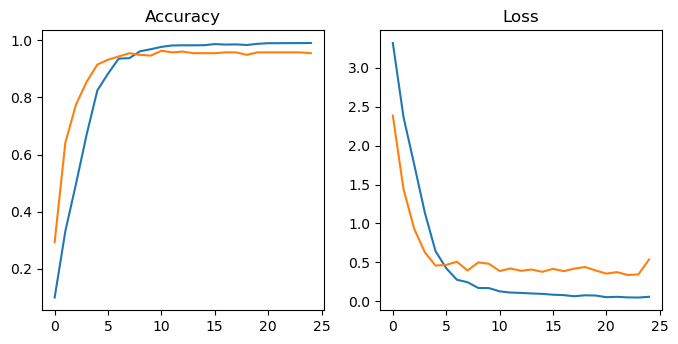

In [9]:
epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(epochs_range, history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range , history.history['val_accuracy'],label ='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(2,2,2)
plt.plot(epochs_range , history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

plt.show()

In [10]:
import pandas as pd

# Extract data from history
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Create DataFrame
df = pd.DataFrame({
    'Epoch': epochs,
    'Train Loss': train_loss,
    'Train Accuracy': train_acc,
    'Validation Loss': val_loss,
    'Validation Accuracy': val_acc
})

# Round float values to 4 decimal places
df = df.round(4)

# Display the table
print(df.to_string(index=False))

 Epoch  Train Loss  Train Accuracy  Validation Loss  Validation Accuracy
     1      3.3204          0.0998           2.3870               0.2934
     2      2.3681          0.3316           1.4393               0.6410
     3      1.7591          0.4976           0.9307               0.7749
     4      1.1372          0.6706           0.6276               0.8547
     5      0.6433          0.8244           0.4579               0.9145
     6      0.4239          0.8828           0.4671               0.9316
     7      0.2756          0.9355           0.5077               0.9430
     8      0.2442          0.9371           0.3944               0.9544
     9      0.1698          0.9612           0.4988               0.9487
    10      0.1681          0.9682           0.4817               0.9459
    11      0.1267          0.9766           0.3876               0.9630
    12      0.1113          0.9814           0.4206               0.9573
    13      0.1064          0.9820           0.3910

In [11]:
# Save as CSV
df.to_csv('training_history_single.csv', index=False)

In [12]:
data = pd.read_csv('training_history_single.csv')

# Display the head and tail of the dataframe
head_data = data.head()
tail_data = data.tail()

(head_data, tail_data)

(   Epoch  Train Loss  Train Accuracy  Validation Loss  Validation Accuracy
 0      1      3.3204          0.0998           2.3870               0.2934
 1      2      2.3681          0.3316           1.4393               0.6410
 2      3      1.7591          0.4976           0.9307               0.7749
 3      4      1.1372          0.6706           0.6276               0.8547
 4      5      0.6433          0.8244           0.4579               0.9145,
     Epoch  Train Loss  Train Accuracy  Validation Loss  Validation Accuracy
 20     21      0.0513          0.9894           0.3547               0.9573
 21     22      0.0560          0.9894           0.3736               0.9573
 22     23      0.0488          0.9897           0.3372               0.9573
 23     24      0.0468          0.9897           0.3440               0.9573
 24     25      0.0566          0.9900           0.5362               0.9544)

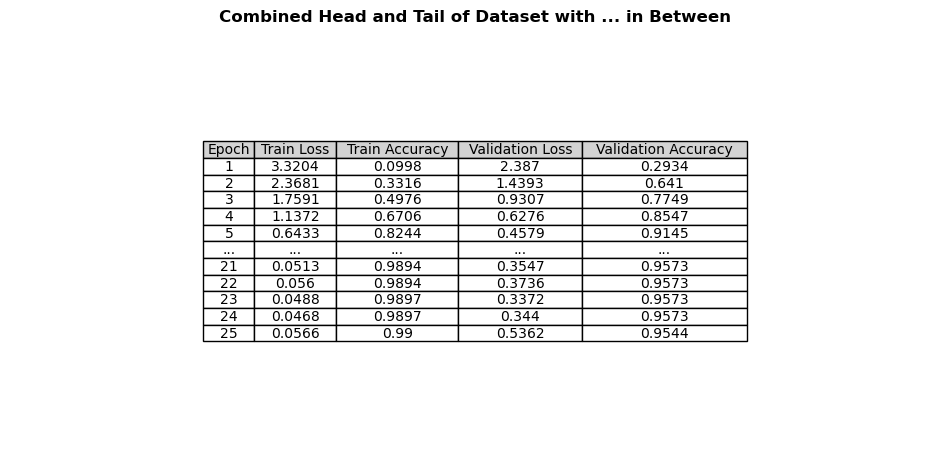

In [13]:
combined_data = pd.concat([head_data, pd.DataFrame([["..."] * len(data.columns)], columns=data.columns), tail_data])

# Display the combined data with style
import matplotlib.pyplot as plt

# Define a function to create a table with styles
def styled_table(dataframe, title):
    fig, ax = plt.subplots(figsize=(12, len(dataframe) / 2))
    ax.axis('off')
    table = ax.table(cellText=dataframe.values,
                     colLabels=dataframe.columns,
                     cellLoc='center',
                     loc='center',
                     colColours=["lightgrey"] * dataframe.shape[1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(dataframe.columns))))
    ax.set_title(title, fontweight="bold")
    plt.show()

styled_table(combined_data, 'Combined Head and Tail of Dataset with ... in Between')

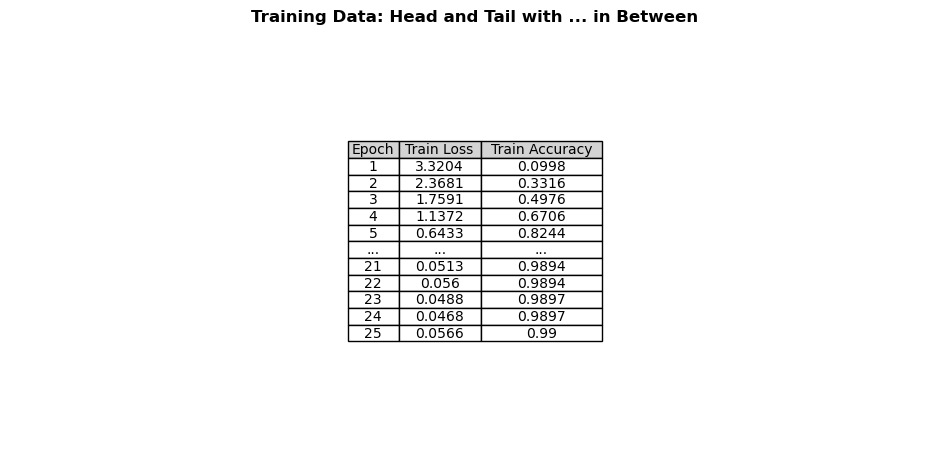

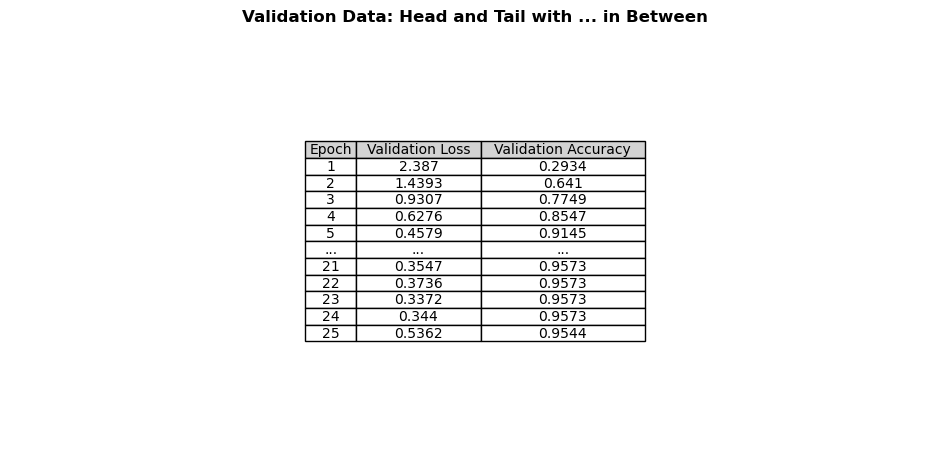

In [14]:
# Split the combined data into training and validation parts
train_data = combined_data[['Epoch', 'Train Loss', 'Train Accuracy']]
validation_data = combined_data[['Epoch', 'Validation Loss', 'Validation Accuracy']]

# Display the training data
styled_table(train_data, 'Training Data: Head and Tail with ... in Between')

# Display the validation data
styled_table(validation_data, 'Validation Data: Head and Tail with ... in Between')

In [11]:
# Define image dimensions
img_width, img_height = 180, 180  # Change as per your model's requirements

# Load and preprocess the image
def load_and_preprocess_image(image_path):
    # Load image
    image = tf.keras.utils.load_img(image_path, target_size=(img_width, img_height))
    # Convert image to array
    img_arr = tf.keras.utils.img_to_array(image)
    # Expand dimensions to match the input shape of the model
    img_bat = tf.expand_dims(img_arr, 0)
    return img_bat

In [12]:
# Function to classify the image
def classify_image(model, image_path):
    # Load and preprocess the image
    img_bat = load_and_preprocess_image(image_path)
    # Predict the class of the image
    predictions = model.predict(img_bat)
    return predictions

In [13]:
# Enter your fruit image to classify
image_path = 'dataset/fruit-and-vegetable-image-recognition/validation/apple/Image_1.jpg'

# Classify the image
predictions = classify_image(model, image_path)


# Get the predicted class and accuracy
predicted_class_index = np.argmax(predictions[0])
predicted_class = data_cat[predicted_class_index]
accuracy = predictions[0][predicted_class_index] * 100

# Print the result
print('Veg / Fruit in Image is {} with accuracy of {:.2f}%'.format(predicted_class, accuracy))

1/1 [==============================] - 1s 1s/step
Veg / Fruit in Image is apple with accuracy of 2320.68%
